# Rio De Janero

![Alt Text](https://media.tenor.com/oW_vzeDVjOcAAAAC/travel-rio-de-janeiro.gif)

In [1]:
import pandas as pd
import glob
import os

In [18]:
customers_dataset = pd.read_csv("../Data/olist_customers_dataset.csv")
geolocation_dataset = pd.read_csv("../Data/olist_geolocation_dataset.csv")
order_items_dataset = pd.read_csv("../Data/olist_order_items_dataset.csv")
order_payments_dataset = pd.read_csv("../Data/olist_order_payments_dataset.csv")
order_reviews_dataset = pd.read_csv("../Data/olist_order_reviews_dataset.csv")
orders_dataset = pd.read_csv("../Data/olist_orders_dataset.csv")
products_dataset = pd.read_csv("../Data/olist_products_dataset.csv")
sellers_dataset = pd.read_csv("../Data/olist_sellers_dataset.csv")
product_category_name_translation = pd.read_csv("../Data/product_category_name_translation.csv")

#### Find duplicates rows in geolocation_dataset by `geolocation_lat` and `geolocation_lng` columns

In [28]:
duplicates = geolocation_dataset[geolocation_dataset.duplicated(subset=['geolocation_lat', 'geolocation_lng'], keep=False)]
duplicates.shape[0]

413907

In [26]:
geolocation_dataset_without_duplicates = geolocation_dataset.drop_duplicates(subset=['geolocation_lat', 'geolocation_lng'])

In [29]:
geolocation_dataset_without_duplicates.shape[0]

718463

### Nombre total de clients :

In [51]:

n_clients = customers_dataset.drop_duplicates(subset=['customer_unique_id']).shape[0]
n_clients


96096

### nombre total de commandes :

In [52]:
n_commandes =  customers_dataset.drop_duplicates(subset=['customer_id']).shape[0]
n_commandes

99441

In [57]:
customers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [58]:
geolocation_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [65]:
merged_df = customers_dataset.merge(geolocation_dataset[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']], 
                                     left_on='customer_zip_code_prefix', 
                                     right_on='geolocation_zip_code_prefix', 
                                     how='left')
merged_df = merged_df.drop('geolocation_zip_code_prefix', axis=1)
merged_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.497396,-47.399241
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.510459,-47.399553
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.480940,-47.394161
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.515413,-47.398194
...,...,...,...,...,...,...,...
15083728,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.599369,-46.905603
15083729,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.593577,-46.910112
15083730,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.584425,-46.892014
15083731,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.595022,-46.918546


<AxesSubplot:>

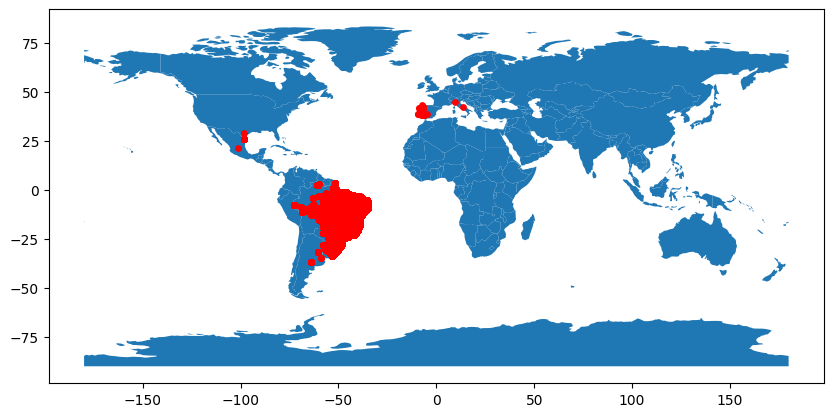

In [66]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame



geometry = [Point(xy) for xy in zip(merged_df['geolocation_lng'], merged_df['geolocation_lat'])]
gdf = GeoDataFrame(merged_df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)